## Domain Figures

In this script is code for recreating the domain contour for density and for the appended plume figures. The data you need to download for this to run completely is the 'revised_stat' folder. This code is written by Madie Mamer (mmamer3@gatech.edu).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo
import matplotlib.patches as patches
from scipy.interpolate import griddata
import matplotlib.colors

## Reading in the files with the time averaged domain

Revise the path to where the folder 'revised_stat' is downloaded to.

In [5]:
path = 'revised_stat'

## Body value averages ##
F1cu2_body = pd.read_csv(path+'/f1cu2_avg_body.csv')

F2cu2_body = pd.read_csv(path+'/f2cu2_avg_body.csv')

F3cu2_body = pd.read_csv(path + '/f3cu2_avg_body.csv')


## Density Contour Figure

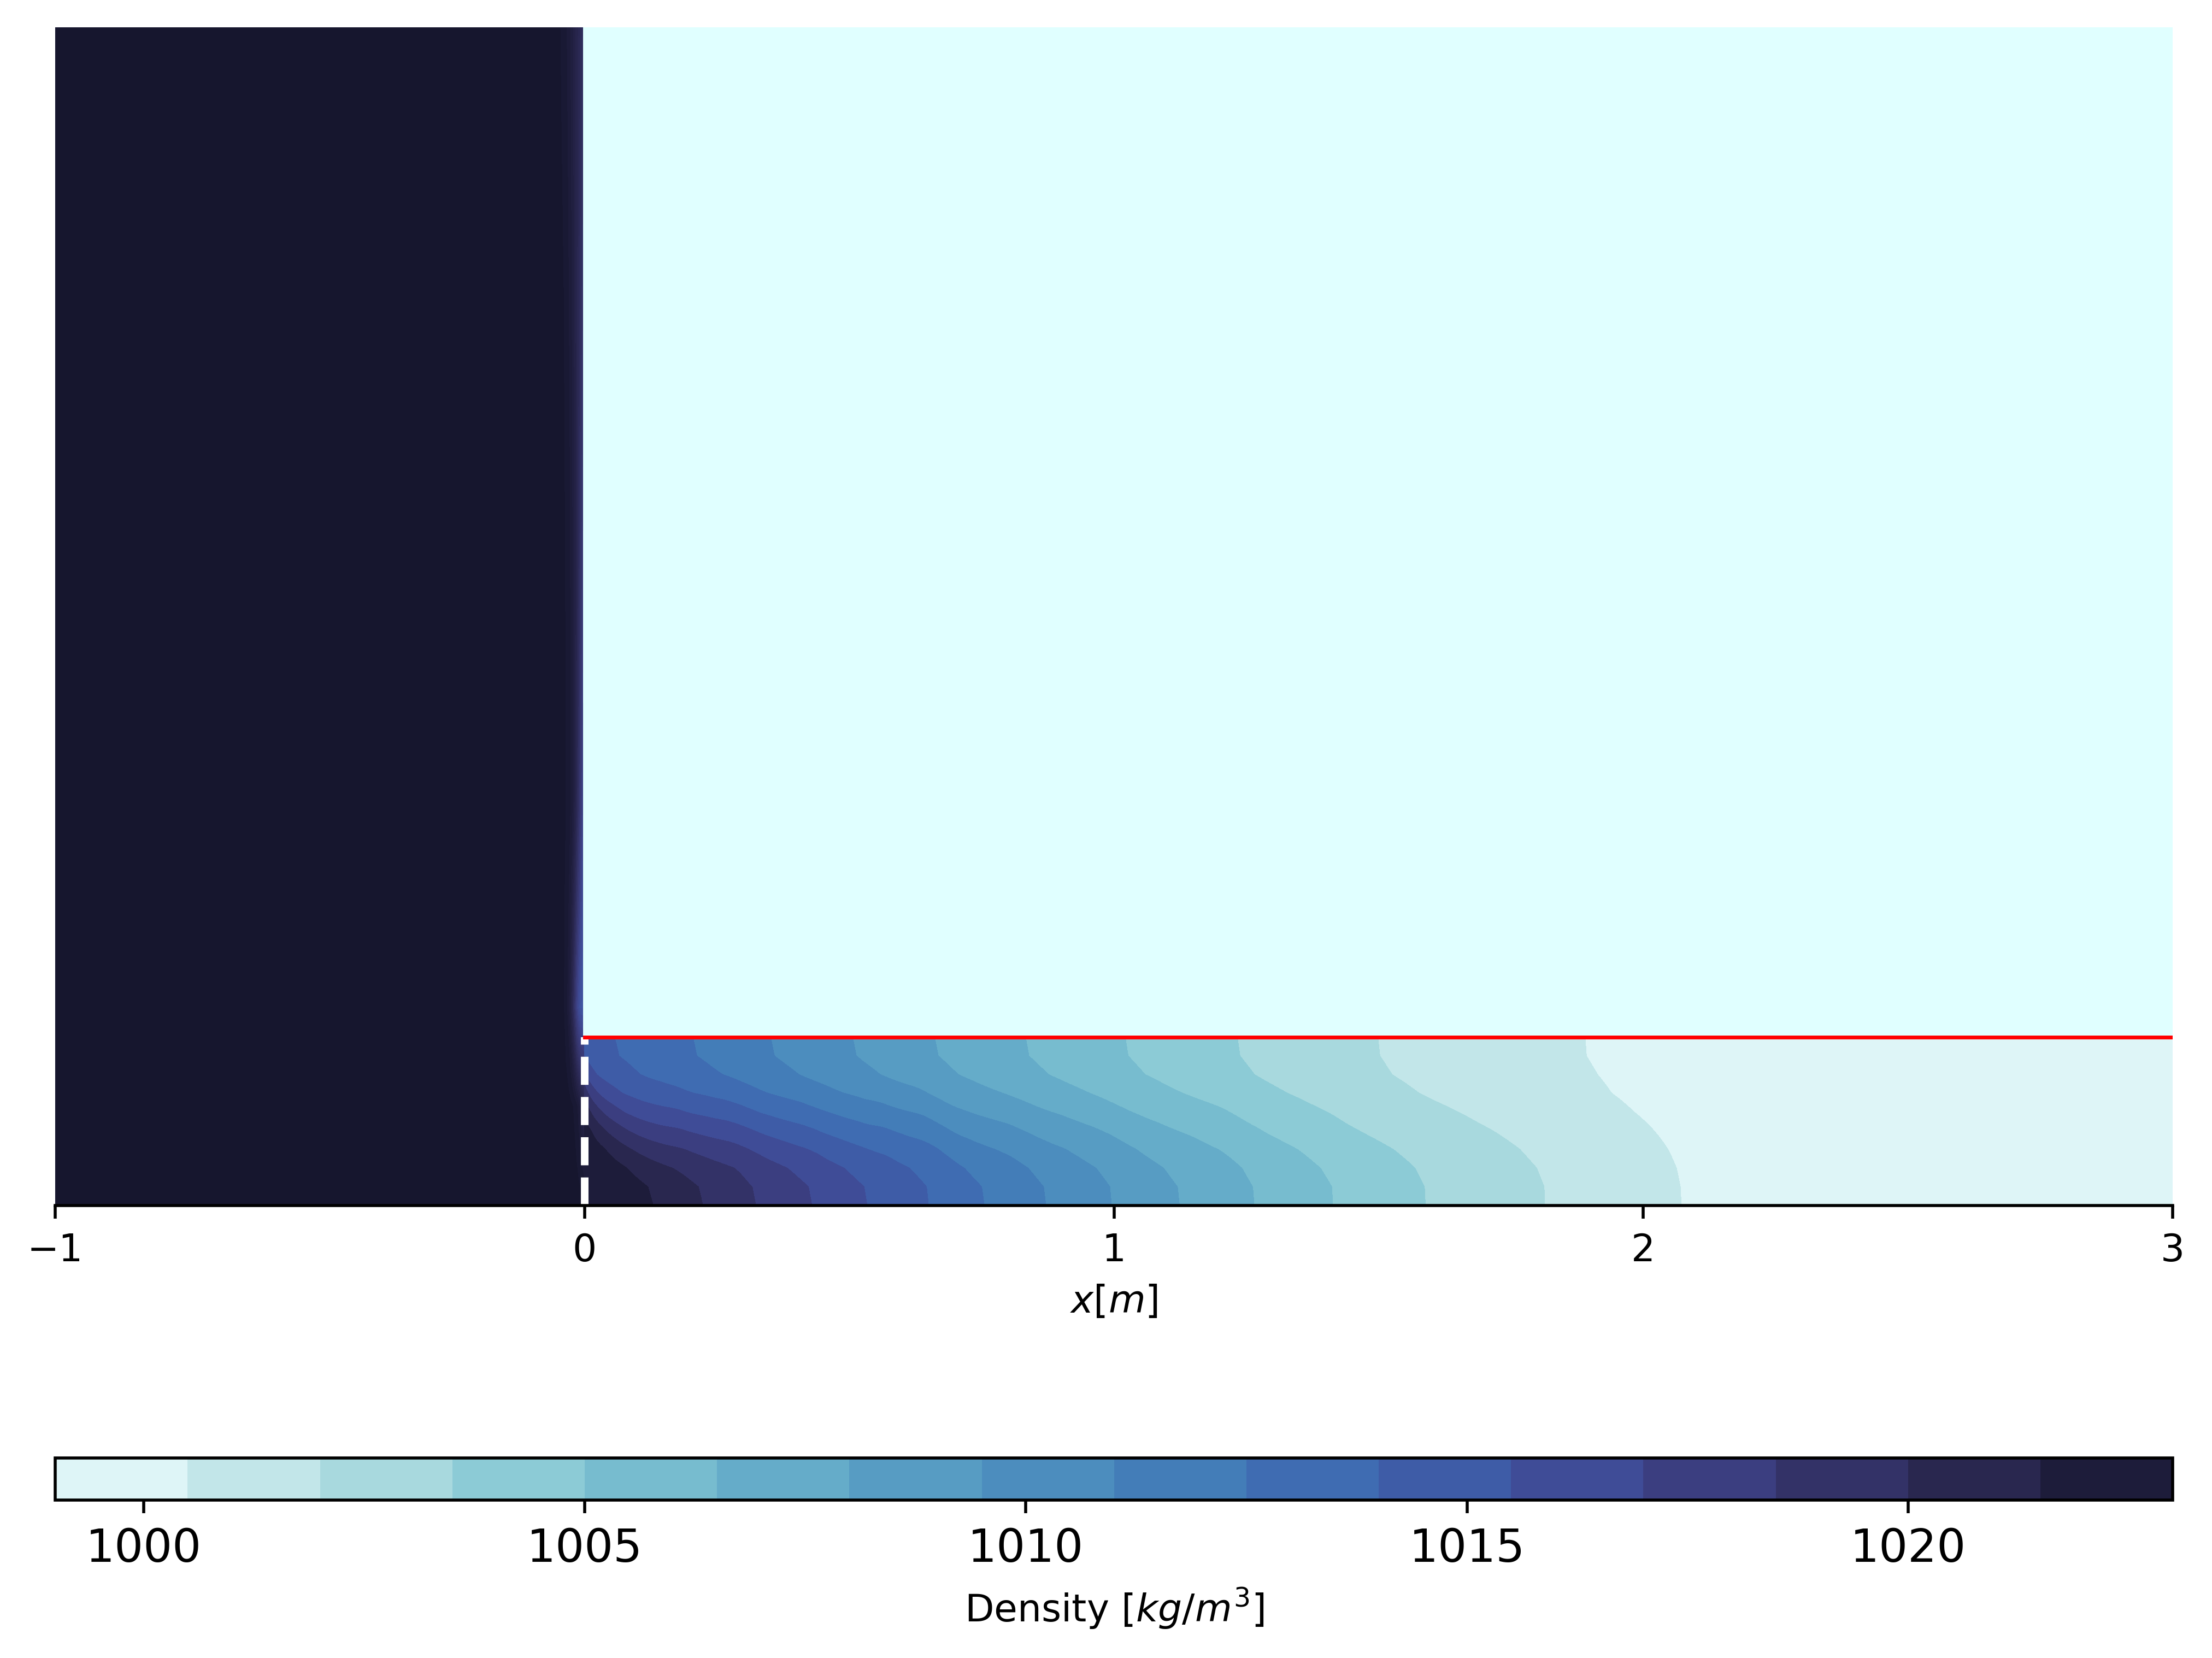

In [3]:

##contours 
F2cu2_channel = F2cu2_body.where(F2cu2_body['x'] >= 2).dropna()
F2cu2_channel = F2cu2_channel.sort_values(by = ['x'])
F2cu2_ocean = F2cu2_body.where(F2cu2_body['x'] <= 2).dropna()
F2cu2_ocean = F2cu2_ocean.sort_values(by = ['x'])


xO = np.linspace(-2,0,500)
yO = np.linspace(0,5,171)
xO1, yO1 = np.meshgrid(xO,yO)

xC = np.linspace(0,30,5000)
yC = np.linspace(0,0.05,10)

xC1,yC1 = np.meshgrid(xC,yC)

xO_pos1 = F2cu2_ocean['x'] - 2
yO_pos1 = F2cu2_ocean['y']

xC_pos1 = F2cu2_channel['x'] - 2
yC_pos1 = F2cu2_channel['y']
 
rhoO1 = F2cu2_ocean['avgDense']
rhoC1 = F2cu2_channel['avgDense']

zgridO1 = griddata((xO_pos1,yO_pos1), rhoO1, (xO1,yO1))
zgridC1 = griddata((xC_pos1,yC_pos1), rhoC1, (xC1,yC1))



##Plotting 

fig, ax = plt.subplots(1,figsize = (10,8), dpi = 500)

iceBase = np.ones((100)) * 0.05 
line = np.linspace(0,30,100)
iceSide = np.ones((100)) * 0
vLine = np.linspace(0.05,5,100)
vLine2 = np.linspace(0,0.05,100)

##### f2 #####
norm = matplotlib.colors.TwoSlopeNorm(vmin=np.nanmin(zgridC1), vcenter = np.nanmean(zgridC1), vmax=np.nanmax(zgridC1))

cO = ax.contourf(xO1,yO1, zgridO1, 20,cmap= cmo.cm.ice_r, vmin = 999, vmax = 1025)
cC = ax.contourf(xC1,yC1, zgridC1, 20, cmap = cmo.cm.ice_r, vmin = 999, vmax = 1025)

ax.plot(line, iceBase, color = 'red', linewidth = 1, zorder = 4)
ax.plot(iceSide, vLine, 'k', linewidth = 1)
ax.plot(iceSide, vLine2, 'white',linestyle = '--',linewidth = 2)


rect = patches.Rectangle((0, 0.05), 3,0.35, linewidth=1, edgecolor='lightcyan', facecolor='lightcyan', zorder = 3)
ax.add_patch(rect)
rect2 = patches.Rectangle((0, 0.15), 1,0.05, linewidth=1, edgecolor='lightcyan', facecolor='lightcyan', zorder = 3)
ax.add_patch(rect2)
cbar = plt.colorbar(cC,location = 'bottom', aspect = 50, label = 'Density $[kg/m^3]$')
cbar.ax.set_xticks([1000, 1005,1010,1015,1020])
cbar.ax.set_xticklabels([1000, 1005,1010,1015,1020],rotation=0, fontsize = 12)
cbar.set_label('Density $[kg/m^3]$')

ax.set_ylim(0,0.35);ax.set_xlim(-1,2);
ax.set_xlabel('$ x[m]$');
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);
ax.spines['left'].set_visible(False);
ax.spines['bottom'].set_visible(True);
ax.set_xticks([-1,0,1,2,3])
ax.set_yticks([]);
plt.savefig('densityContour.png')

### Plume Contour Figures

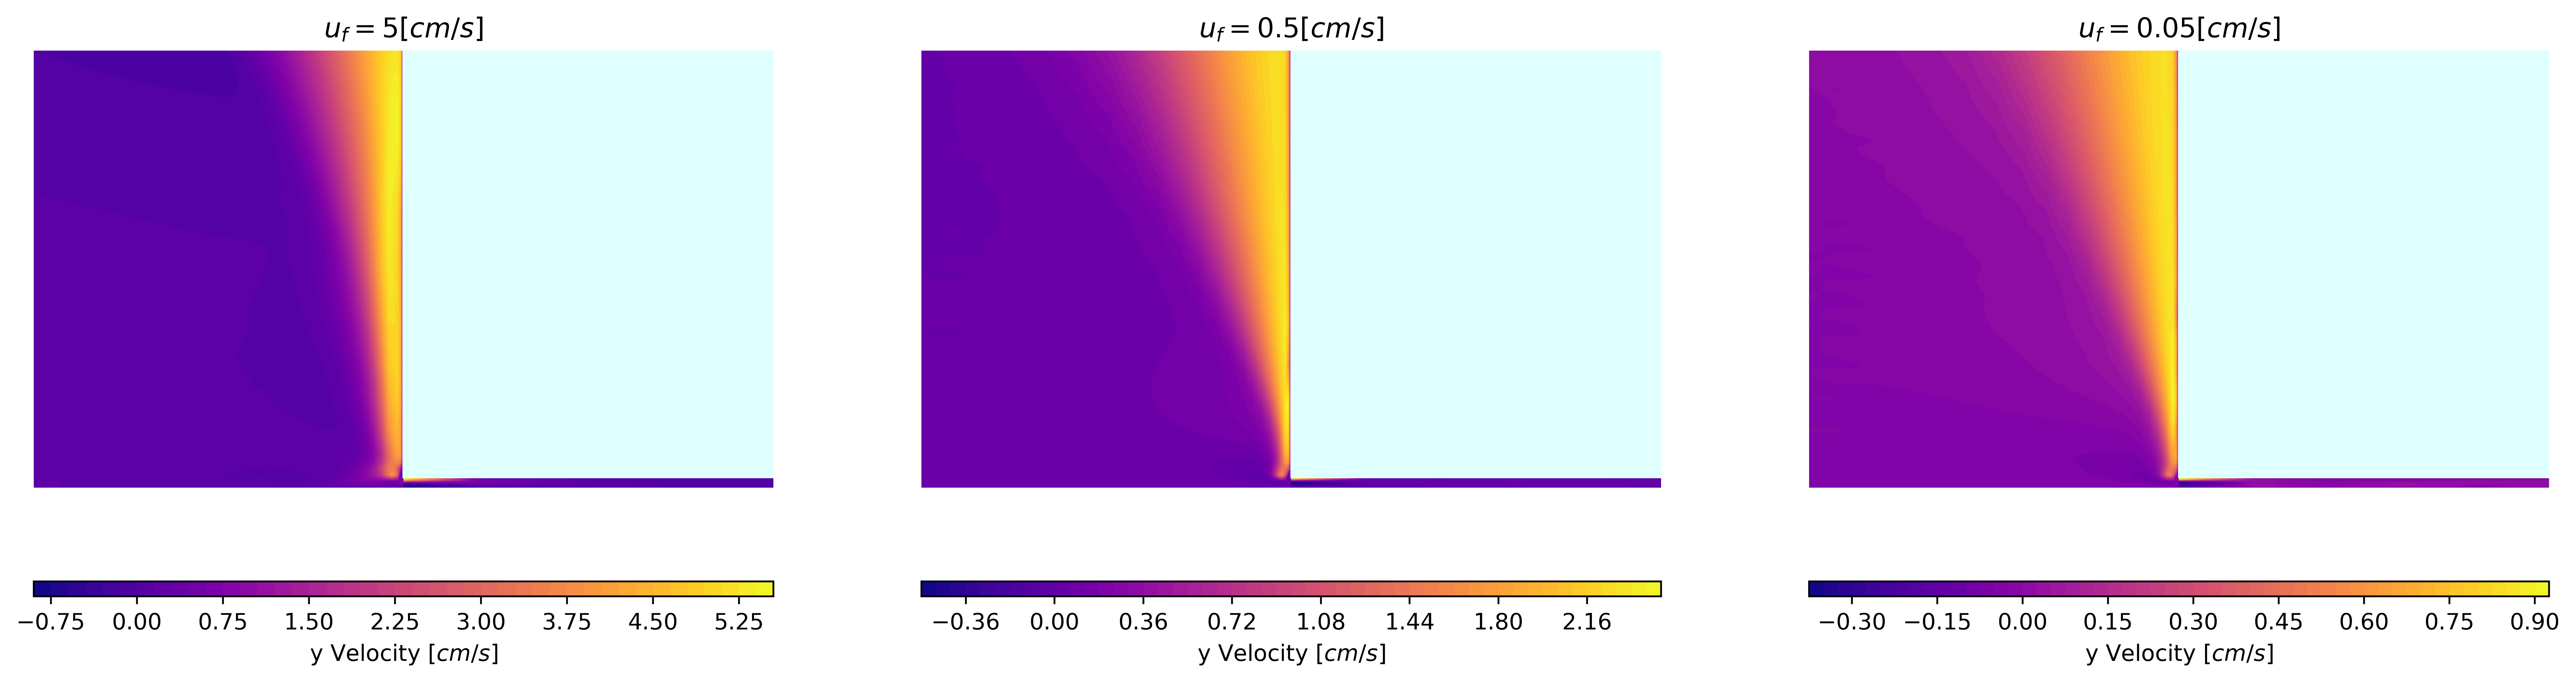

In [6]:
##contours 
fig, ax = plt.subplots(1,3,figsize = (20,5), dpi = 500)

avgBody_data = [F1cu2_body, F2cu2_body, F3cu2_body]
freshwaterVel = ['$u_f = 5 [cm/s]$', '$u_f = 0.5 [cm/s]$', '$u_f = 0.05 [cm/s]$']
for i in range(0,3):
    avgBody = avgBody_data[i]
    F2cu2_channel = avgBody.where(avgBody['x'] >= 2).dropna()
    F2cu2_channel = F2cu2_channel.sort_values(by = ['x'])
    F2cu2_ocean = avgBody.where(avgBody['x'] <= 2).dropna()
    F2cu2_ocean = F2cu2_ocean.sort_values(by = ['x'])


    xO = np.linspace(0,2,500)
    yO = np.linspace(0,5,171)
    xO1, yO1 = np.meshgrid(xO,yO)

    xC = np.linspace(2,32,300)
    yC = np.linspace(0,0.05,10)
    xC1,yC1 = np.meshgrid(xC,yC)

    xO_pos1 = F2cu2_ocean['x']
    yO_pos1 = F2cu2_ocean['y']

    xC_pos1 = F2cu2_channel['x']
    yC_pos1 = F2cu2_channel['y']

    yVel_O1 = F2cu2_ocean['avg_yVel']
    yVel_C1 = F2cu2_channel['avg_yVel']
    zgridO1 = griddata((xO_pos1,yO_pos1), yVel_O1, (xO1,yO1))
    zgridC1 = griddata((xC_pos1,yC_pos1), yVel_C1, (xC1,yC1))


    ##Plotting 


    #ax.set_xlim(0.4,0.7); ax.set_ylim(0,0.5)


    iceBase = np.ones((100)) * 0.05 
    line = np.linspace(2,31,100)
    iceSide = np.ones((100)) * 2
    vLine = np.linspace(0.05,2,100)
    vLine2 = np.linspace(0,0.05,100)




    ##### f2 #####

    cO = ax[i].contourf(xO1,yO1, zgridO1 * 100, 50,cmap= 'plasma' )#, vmin = 0, vmax = 1)
    cC = ax[i].contourf(xC1,yC1, zgridC1 * 100, 50, cmap = 'plasma' )#, vmin = 0, vmax = 1)

    #ax[i].plot(line, iceBase, color = 'red', linewidth = 1, zorder = 4)
    ax[i].plot(iceSide, vLine, 'k', linewidth = 1)
    #ax[i].plot(iceSide, vLine2, 'white',linestyle = '--',linewidth = 2)


    #skip = (slice(None, None, 5))
    #ax.quiver(xO_pos1[skip], yO_pos1[skip],xVel[skip], yVel_O1[skip], color = 'white', headlength = 3, headwidth = 3, headaxislength = 2)

    rect = patches.Rectangle((2, 0.05), 3, 2, linewidth=1, edgecolor='lightcyan', facecolor='lightcyan', zorder = 3)
    ax[i].add_patch(rect)
    #rect2 = patches.Rectangle((0, 0.15), 1,0.05, linewidth=1, edgecolor='lightcyan', facecolor='lightcyan', zorder = 3)
    #ax.add_patch(rect2)
    cbar = plt.colorbar(cC,location = 'bottom', aspect = 50, label = 'y Velocity $[cm/s]$')
    #cbar.ax.set_xticks([1000, 1005,1010,1015,1020])
    #cbar.ax.set_xticklabels([1000, 1005,1010,1015,1020],rotation=0, fontsize = 12)

    ax[i].set_ylim(0,2);ax[i].set_xlim(1.5,2.5);

    ax[i].spines['right'].set_visible(False);
    ax[i].spines['top'].set_visible(False);
    ax[i].spines['left'].set_visible(False);
    ax[i].spines['bottom'].set_visible(False);
    ax[i].set_xticks([])
    ax[i].set_yticks([]);
    ax[i].set_title(str(freshwaterVel[i]))
#ax[i].set_title('$u_f = \, 5 \, cm/s$');
plt.savefig('plumes.png')
